# _COUNTRIES OF THE WORLD_

Jupyter Notebook by : Johnny Liang (100832977)

Did you know that the population of China and India combined make up around 33% of the world's population? How is that even possible when we have more than 200 countries in this world? In this Jupyter we'll explore the different countries of this world and see relationships within different parameters. To do this, we'll use a dataset from Kaggle titled 'Countries of the World' by Fernando Lasso. 
The reason why I chose Countries of the World is because I saw many interviews in East Asia(China, Korea, Japan, and Hong Kong) and Europa(Sweden, Spain) streets in which people from that said country would list reasons on why are the birthrates from their country dropping. And, even though this dataset doesn't work with data over the years, I wanted to see if this question would still be answered by the parameters from this data set. Besides that, Some other questions I'll explore are:
- Does richer countries (by GDP per capita) have lower birthrate?
* Does GDP per capita increases as the service, industry, or agriculture index gets higher?
- Which continents have the lower birthrates? Can we confirm if the higher the GDP per capita, the lower the birthrate?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection

In [2]:
url = "https://github.com/JohnnyLiang-OTU/DatasetAssignment/blob/main/countries%20of%20the%20world.csv?raw=true"
dataset = pd.read_csv(url)
dataset

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


## Data Cleaning

Here I'm dropping NAN values, sorting the values by population, and reseting the rankings of the countries accordingly after eliminating rows which contained NAN values.

In [3]:
dataset = dataset.dropna()
dataset.sort_values(by=['Population'])
dataset.reset_index(inplace=True, drop=True)

# Data Analyses

### Does richer countries (by GDP per capita) have lower birthrate?

In [4]:
BIRTHgdp = dataset.loc[:, ['Country', 'Birthrate', 'GDP ($ per capita)']]
BIRTHgdp.columns = ['Country', 'Birthrate', 'GDP']
BIRTHgdp['Birthrate'] = BIRTHgdp['Birthrate'].str.replace(',','.').astype(float)

I declare a dataset with the values of Birthrate, and GDP per capita.
And, since the Birthrate was a string value because of the comma, I replaced the comma with a point and changed it to a float type.

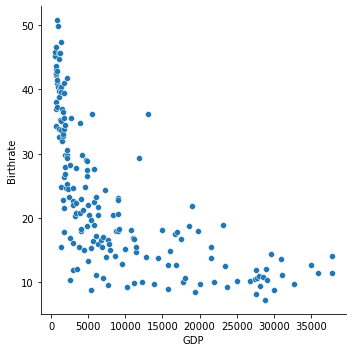

In [5]:
BIRTHgdp = BIRTHgdp.sort_values(by='GDP')
BIRTHgdp = sns.relplot(data=BIRTHgdp, x=BIRTHgdp['GDP'], y=BIRTHgdp['Birthrate'])

The plot shows that the lower the birthrate, the higher the maximum of GDP per capita. So yes, it might be true that a richer country by GDP per capita will equate to a lower birthrate.

### Does GDP per capita increase as the service, industry, or agriculture index gets higher?

First, I'll plot the service against GDP per capita.

In [6]:
SERVICEgdp = dataset.loc[:, ['Country', 'Service', 'GDP ($ per capita)']]
SERVICEgdp['Service'] = SERVICEgdp['Service'].str.replace(',','.').astype(float)
SERVICEgdp.sort_values(by='Service')

,Country,Service,GDP ($ per capita)
53,Equatorial Guinea,0.062,2700.0
97,Liberia,0.177,1000.0
133,Qatar,0.197,21500.0
145,Sierra Leone,0.210,500.0
120,Nigeria,0.244,900.0
...,...,...,...
11,"Bahamas, The",0.900,16700.0
76,Hong Kong,0.906,28800.0
24,British Virgin Is.,0.920,16000.0
99,Macau,0.927,19400.0


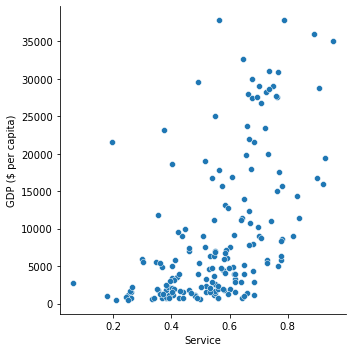

In [7]:
SERVICEgdpPlot = sns.relplot(data=SERVICEgdp, x=SERVICEgdp['Service'], y=SERVICEgdp['GDP ($ per capita)'])

According to the plot, service doesn't equate to GDP per capita. So no, GDP per capita doesn't get higher as the service index increases.

Now I'll do the same for Industry.

In [8]:
INDUSTRYgdp = dataset.loc[:, ['Country', 'Industry', 'GDP ($ per capita)']]
INDUSTRYgdp['Industry']  = INDUSTRYgdp['Industry'].str.replace(',','.').astype(float)
INDUSTRYgdp.sort_values(by='Industry')

,Country,Industry,GDP ($ per capita)
33,Cayman Islands,0.032,35000.0
39,Comoros,0.040,700.0
97,Liberia,0.054,1000.0
24,British Virgin Is.,0.062,16000.0
11,"Bahamas, The",0.070,16700.0
...,...,...,...
2,Algeria,0.600,6000.0
142,Saudi Arabia,0.613,11800.0
82,Iraq,0.666,1500.0
133,Qatar,0.801,21500.0


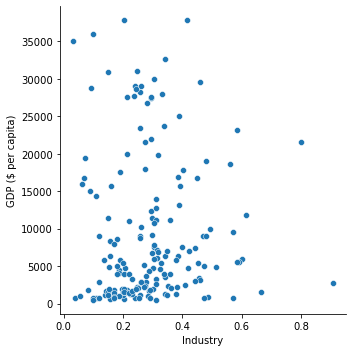

In [9]:
INDUSTRYgdpPlot = sns.relplot(data=INDUSTRYgdp, x=INDUSTRYgdp['Industry'], y=INDUSTRYgdp['GDP ($ per capita)'])

It seems that Industry doesn't affect GDP per capita either. So it is not true that as Industry index gets hither, GDP per capita will increase with it.

Finally, I'll also plot the Agriculture vs GDP per capita.

In [10]:
AGROgdp = dataset.loc[:,['Country', 'Agriculture', 'GDP ($ per capita)']]
AGROgdp['Agriculture'] = AGROgdp['Agriculture'].str.replace(',','.').astype(float)
AGROgdp.sort_values(by='Agriculture')

,Country,Agriculture,GDP ($ per capita)
146,Singapore,0.000,23700.0
99,Macau,0.001,19400.0
76,Hong Kong,0.001,28800.0
133,Qatar,0.002,21500.0
92,Kuwait,0.004,19000.0
...,...,...,...
34,Central African Rep.,0.550,1100.0
28,Burma,0.564,1800.0
72,Guinea-Bissau,0.620,800.0
147,Somalia,0.650,500.0


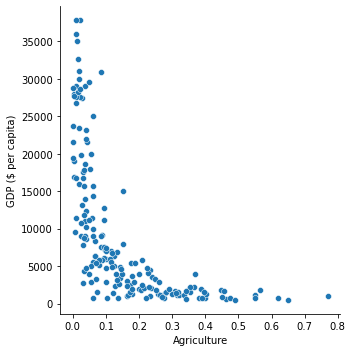

In [11]:
AGROgdpPlot = sns.relplot(data=AGROgdp, x=AGROgdp['Agriculture'], y=AGROgdp['GDP ($ per capita)'])

This plot shows, counterintuitively, that the lower the agriculture index the higher the maximum GDP per capita. So it is not true that as Agriculture goes up, the GDP per capita will go up, but we did discover the opposite. 

Now let's see which regions have the lower birthrates. 

I'll group the data from Birthrate and GDP ($ per capita) columns by region.
I'll look for their means and compare them.

### Population and GDP by Region

In [12]:
dataset['Birthrate'] = dataset['Birthrate'].str.replace(',','.').astype(float)

C:\Users\Johnny Liang\AppData\Local\Temp\ipykernel_13924\2835453731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Birthrate'] = dataset['Birthrate'].str.replace(',','.').astype(float)


In [13]:
RegionGroup = dataset[['Birthrate','GDP ($ per capita)']].groupby(dataset['Region'])
RegionGroupmean = RegionGroup.mean()

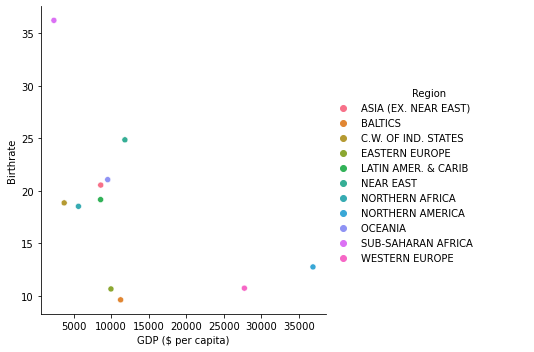

In [14]:
RegGPlot = sns.relplot(data=RegionGroupmean, x=RegionGroupmean['GDP ($ per capita)'], y=RegionGroupmean['Birthrate'], hue="Region")

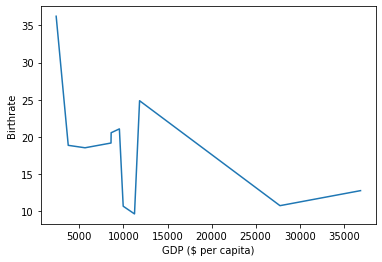

In [15]:
RegGPlot2 = sns.lineplot(data=RegionGroupmean, x=RegionGroupmean['GDP ($ per capita)'], y=RegionGroupmean['Birthrate'])

We once again see the pattern of 'Richer countries by GDP = Less Birthrate' though we can see some exceptions with Eastern Europe and the Baltics.

# References
The Dataset was gathered from : https://www.kaggle.com/datasets/fernandol/countries-of-the-world. <br/>
Packages from [Numpy](https://numpy.org/) and [Pandas](https://pandas.pydata.org/).